In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
import cv2
import warnings
import tensorflow as tf 
from pathlib import Path
import PIL
import os
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

In [73]:
glaucoma = Path('/kaggle/input/eye-diseases-classification/dataset/glaucoma')
cataract = Path('/kaggle/input/eye-diseases-classification/dataset/cataract')
normal = Path('/kaggle/input/eye-diseases-classification/dataset/normal')
diabetic_retinopathy = Path('/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy')

In [74]:
disease_type = [glaucoma, cataract,normal,diabetic_retinopathy]
df = pd.DataFrame()
from tqdm import tqdm
for types in disease_type:
    for imagepath in tqdm(list(types.iterdir()), desc= str(types)):
        df = pd.concat([df, pd.DataFrame({'image': [str(imagepath)],'disease_type': [disease_type.index(types)]})], ignore_index=True)
        
df

/kaggle/input/eye-diseases-classification/dataset/glaucoma: 100%|██████████| 1007/1007 [00:00<00:00, 1953.56it/s]
/kaggle/input/eye-diseases-classification/dataset/cataract: 100%|██████████| 1038/1038 [00:00<00:00, 1718.95it/s]
/kaggle/input/eye-diseases-classification/dataset/normal: 100%|██████████| 1074/1074 [00:00<00:00, 1782.42it/s]
/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy: 100%|██████████| 1098/1098 [00:00<00:00, 1844.67it/s]


,image,disease_type
0,/kaggle/input/eye-diseases-classification/data...,0
1,/kaggle/input/eye-diseases-classification/data...,0
2,/kaggle/input/eye-diseases-classification/data...,0
3,/kaggle/input/eye-diseases-classification/data...,0
4,/kaggle/input/eye-diseases-classification/data...,0
...,...,...
4212,/kaggle/input/eye-diseases-classification/data...,3
4213,/kaggle/input/eye-diseases-classification/data...,3
4214,/kaggle/input/eye-diseases-classification/data...,3
4215,/kaggle/input/eye-diseases-classification/data...,3


In [75]:
df.disease_type.value_counts()
df['disease_type'] = df['disease_type'].map({0:'glaucoma',1:'cataract',2:'normal',3:'diabetic_retinopathy'})
df.disease_type.value_counts()

disease_type
diabetic_retinopathy    1098
normal                  1074
cataract                1038
glaucoma                1007
Name: count, dtype: int64

In [76]:
df.head(20)

,image,disease_type
0,/kaggle/input/eye-diseases-classification/data...,glaucoma
1,/kaggle/input/eye-diseases-classification/data...,glaucoma
2,/kaggle/input/eye-diseases-classification/data...,glaucoma
3,/kaggle/input/eye-diseases-classification/data...,glaucoma
4,/kaggle/input/eye-diseases-classification/data...,glaucoma
5,/kaggle/input/eye-diseases-classification/data...,glaucoma
6,/kaggle/input/eye-diseases-classification/data...,glaucoma
7,/kaggle/input/eye-diseases-classification/data...,glaucoma
8,/kaggle/input/eye-diseases-classification/data...,glaucoma
9,/kaggle/input/eye-diseases-classification/data...,glaucoma


In [77]:
df.tail(20)

,image,disease_type
4197,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4198,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4199,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4200,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4201,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4202,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4203,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4204,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4205,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy
4206,/kaggle/input/eye-diseases-classification/data...,diabetic_retinopathy


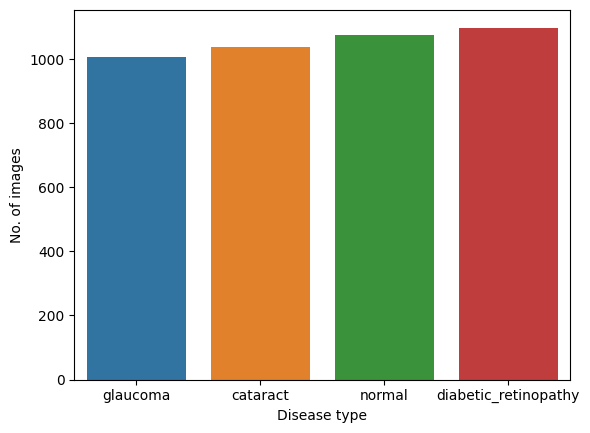

In [78]:
sns.countplot(x = 'disease_type', data = df)
plt.xlabel("Disease type")
plt.ylabel("No. of images")
plt.show()

In [79]:
null_values = df.isnull().sum()

print("Columns with Null Values:")
print(null_values[null_values > 0])

#As series column is not our target column, we will not make any changes to it

Columns with Null Values:
Series([], dtype: int64)


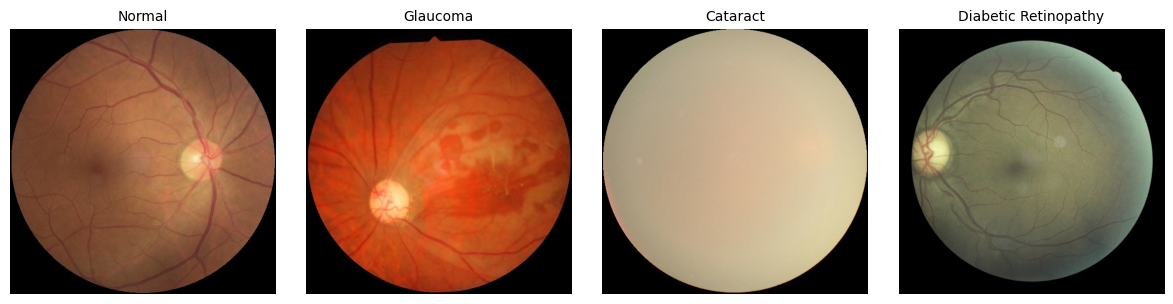

In [80]:
#Visualizing the images
image_data = [
    {'path':'/kaggle/input/eye-diseases-classification/dataset/normal/1034_right.jpg','label':'Normal'},
    {'path':'/kaggle/input/eye-diseases-classification/dataset/glaucoma/1020_left.jpg','label':'Glaucoma'},
    {'path':'/kaggle/input/eye-diseases-classification/dataset/cataract/1062_right.jpg','label':'Cataract'},
    {'path':'/kaggle/input/eye-diseases-classification/dataset/diabetic_retinopathy/10007_left.jpeg', 'label':'Diabetic Retinopathy'}
    ]

fig, axs = plt.subplots(1, len(image_data), figsize=(12, 3))

for i, data in enumerate(image_data):
    img_path = data['path']
    label = data['label']

    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')  
    axs[i].set_title(label, fontsize=10)  

plt.tight_layout()

plt.show()


In [81]:
df1 = df.sample(frac=1).reset_index(drop=True)

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.25)

In [84]:
train_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = True,
                                          subset = 'training')

Found 3163 validated image filenames belonging to 4 classes.


In [85]:
valid_data = datagen.flow_from_dataframe(dataframe=df1,
                                          x_col ='image',
                                          y_col = 'disease_type',
                                          target_size=(224,224),
                                          class_mode = 'categorical',
                                          batch_size = 32,
                                          shuffle = False,
                                          subset = 'validation')

Found 1054 validated image filenames belonging to 4 classes.


In [86]:
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

In [87]:
# model = models.Sequential([
#     base_model,
#     layers.GlobalAveragePooling2D(),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.1),
#     layers.Dense(4, activation='softmax') 
# ])

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist1 = model.fit(train_data, epochs=11, validation_data=valid_data)
loss1, acc1 = model.evaluate(valid_data, verbose=2)
print('\nTest accuracy:', acc1)


Epoch 1/11
99/99 [==============================] - 41s 381ms/step - loss: 0.5944 - accuracy: 0.7856 - val_loss: 0.4193 - val_accuracy: 0.8435
Epoch 2/11
99/99 [==============================] - 37s 373ms/step - loss: 0.3503 - accuracy: 0.8707 - val_loss: 0.3771 - val_accuracy: 0.8416
Epoch 3/11
99/99 [==============================] - 37s 379ms/step - loss: 0.2911 - accuracy: 0.8906 - val_loss: 0.3242 - val_accuracy: 0.8786
Epoch 4/11
99/99 [==============================] - 37s 374ms/step - loss: 0.2552 - accuracy: 0.9093 - val_loss: 0.3040 - val_accuracy: 0.8928
Epoch 5/11
99/99 [==============================] - 37s 369ms/step - loss: 0.2254 - accuracy: 0.9213 - val_loss: 0.2892 - val_accuracy: 0.8985
Epoch 6/11
99/99 [==============================] - 37s 373ms/step - loss: 0.1973 - accuracy: 0.9317 - val_loss: 0.2772 - val_accuracy: 0.8975
Epoch 7/11
99/99 [==============================] - 36s 365ms/step - loss: 0.1923 - accuracy: 0.9336 - val_loss: 0.3412 - val_accuracy: 0.8757

In [88]:
#Same model with Dropout of 0.1
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist2 = model.fit(train_data, epochs=11, validation_data=valid_data)
loss2, acc2 = model.evaluate(valid_data, verbose=2)
print('\nTest accuracy:', acc2)


Epoch 1/11
99/99 [==============================] - 41s 376ms/step - loss: 0.6259 - accuracy: 0.7733 - val_loss: 0.4456 - val_accuracy: 0.8235
Epoch 2/11
99/99 [==============================] - 36s 365ms/step - loss: 0.3524 - accuracy: 0.8669 - val_loss: 0.3394 - val_accuracy: 0.8833
Epoch 3/11
99/99 [==============================] - 36s 368ms/step - loss: 0.3058 - accuracy: 0.8821 - val_loss: 0.3024 - val_accuracy: 0.8975
Epoch 4/11
99/99 [==============================] - 36s 364ms/step - loss: 0.2536 - accuracy: 0.9061 - val_loss: 0.3162 - val_accuracy: 0.8899
Epoch 5/11
99/99 [==============================] - 37s 375ms/step - loss: 0.2445 - accuracy: 0.9115 - val_loss: 0.2811 - val_accuracy: 0.8956
Epoch 6/11
99/99 [==============================] - 37s 370ms/step - loss: 0.2179 - accuracy: 0.9181 - val_loss: 0.2958 - val_accuracy: 0.9013
Epoch 7/11
99/99 [==============================] - 36s 366ms/step - loss: 0.2028 - accuracy: 0.9260 - val_loss: 0.2568 - val_accuracy: 0.9070

In [89]:
#ResNet50 model with 1024 layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist3 = model.fit(train_data, epochs=16, validation_data=valid_data)
loss3, acc3 = model.evaluate(valid_data, verbose=2)
print('\nTest accuracy:', acc3)


Epoch 1/16
99/99 [==============================] - 42s 387ms/step - loss: 0.6557 - accuracy: 0.7825 - val_loss: 0.4343 - val_accuracy: 0.8235
Epoch 2/16
99/99 [==============================] - 37s 373ms/step - loss: 0.3198 - accuracy: 0.8795 - val_loss: 0.3833 - val_accuracy: 0.8387
Epoch 3/16
99/99 [==============================] - 37s 377ms/step - loss: 0.2764 - accuracy: 0.8995 - val_loss: 0.2978 - val_accuracy: 0.8852
Epoch 4/16
99/99 [==============================] - 37s 375ms/step - loss: 0.2318 - accuracy: 0.9165 - val_loss: 0.2937 - val_accuracy: 0.8824
Epoch 5/16
99/99 [==============================] - 37s 372ms/step - loss: 0.2097 - accuracy: 0.9229 - val_loss: 0.3072 - val_accuracy: 0.8985
Epoch 6/16
99/99 [==============================] - 37s 371ms/step - loss: 0.1847 - accuracy: 0.9346 - val_loss: 0.2802 - val_accuracy: 0.8937
Epoch 7/16
99/99 [==============================] - 36s 369ms/step - loss: 0.1631 - accuracy: 0.9437 - val_loss: 0.2777 - val_accuracy: 0.8994

In [90]:
#Same model with Dropout of 0.1
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist4 = model.fit(train_data, epochs=16, validation_data=valid_data)
loss4, acc4 = model.evaluate(valid_data, verbose=2)
print('\nTest accuracy:', acc4)


Epoch 1/16
99/99 [==============================] - 43s 382ms/step - loss: 0.5669 - accuracy: 0.7939 - val_loss: 0.3961 - val_accuracy: 0.8529
Epoch 2/16
99/99 [==============================] - 37s 372ms/step - loss: 0.3315 - accuracy: 0.8786 - val_loss: 0.3306 - val_accuracy: 0.8786
Epoch 3/16
99/99 [==============================] - 37s 374ms/step - loss: 0.2749 - accuracy: 0.8985 - val_loss: 0.3175 - val_accuracy: 0.8767
Epoch 4/16
99/99 [==============================] - 36s 367ms/step - loss: 0.2452 - accuracy: 0.9086 - val_loss: 0.3030 - val_accuracy: 0.8748
Epoch 5/16
99/99 [==============================] - 36s 369ms/step - loss: 0.2157 - accuracy: 0.9206 - val_loss: 0.2681 - val_accuracy: 0.9080
Epoch 6/16
99/99 [==============================] - 38s 381ms/step - loss: 0.1846 - accuracy: 0.9336 - val_loss: 0.2610 - val_accuracy: 0.9032
Epoch 7/16
99/99 [==============================] - 37s 373ms/step - loss: 0.1702 - accuracy: 0.9402 - val_loss: 0.2629 - val_accuracy: 0.9070

In [91]:
# # Plot training accuracy of hist1
# plt.plot(hist1.history['accuracy'], label='accuracy')
# plt.plot(hist1.history['val_accuracy'], label='val_accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.show()

In [92]:
#VGG
base_model_vgg = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model_vgg.trainable = False

In [93]:
model_vgg = models.Sequential([
    base_model_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_vgg.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist1_vgg = model_vgg.fit(train_data, epochs=11, validation_data=valid_data)

loss1_vgg, acc1_vgg = model_vgg.evaluate(valid_data, verbose=2)
print('\nTest accuracy (VGG):', acc1_vgg)


Epoch 1/11
99/99 [==============================] - 39s 378ms/step - loss: 0.7284 - accuracy: 0.7597 - val_loss: 0.5044 - val_accuracy: 0.8083
Epoch 2/11
99/99 [==============================] - 37s 372ms/step - loss: 0.3607 - accuracy: 0.8568 - val_loss: 0.4066 - val_accuracy: 0.8387
Epoch 3/11
99/99 [==============================] - 37s 371ms/step - loss: 0.2871 - accuracy: 0.8969 - val_loss: 0.4220 - val_accuracy: 0.8397
Epoch 4/11
99/99 [==============================] - 37s 370ms/step - loss: 0.2426 - accuracy: 0.9067 - val_loss: 0.3651 - val_accuracy: 0.8491
Epoch 5/11
99/99 [==============================] - 37s 374ms/step - loss: 0.2261 - accuracy: 0.9159 - val_loss: 0.3729 - val_accuracy: 0.8510
Epoch 6/11
99/99 [==============================] - 37s 376ms/step - loss: 0.1950 - accuracy: 0.9270 - val_loss: 0.3606 - val_accuracy: 0.8539
Epoch 7/11
99/99 [==============================] - 37s 378ms/step - loss: 0.1695 - accuracy: 0.9374 - val_loss: 0.3239 - val_accuracy: 0.8653

In [94]:
#VGG with 512 layers and Dropout 0.1
model_vgg = models.Sequential([
    base_model_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(4, activation='softmax')
])

model_vgg.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist2_vgg = model_vgg.fit(train_data, epochs=11, validation_data=valid_data)

loss2_vgg, acc2_vgg = model_vgg.evaluate(valid_data, verbose=2)
print('\nTest accuracy (VGG):', acc2_vgg)


Epoch 1/11
99/99 [==============================] - 38s 367ms/step - loss: 0.8672 - accuracy: 0.7161 - val_loss: 0.4753 - val_accuracy: 0.8273
Epoch 2/11
99/99 [==============================] - 37s 377ms/step - loss: 0.4704 - accuracy: 0.8207 - val_loss: 0.4262 - val_accuracy: 0.8416
Epoch 3/11
99/99 [==============================] - 37s 371ms/step - loss: 0.3640 - accuracy: 0.8625 - val_loss: 0.3742 - val_accuracy: 0.8435
Epoch 4/11
99/99 [==============================] - 37s 378ms/step - loss: 0.3171 - accuracy: 0.8795 - val_loss: 0.3712 - val_accuracy: 0.8539
Epoch 5/11
99/99 [==============================] - 37s 374ms/step - loss: 0.2638 - accuracy: 0.9029 - val_loss: 0.3666 - val_accuracy: 0.8558
Epoch 6/11
99/99 [==============================] - 37s 372ms/step - loss: 0.2241 - accuracy: 0.9137 - val_loss: 0.3547 - val_accuracy: 0.8672
Epoch 7/11
99/99 [==============================] - 37s 379ms/step - loss: 0.2212 - accuracy: 0.9165 - val_loss: 0.3169 - val_accuracy: 0.8672

In [95]:
#VGG16 with 1024 layers
model_vgg = models.Sequential([
    base_model_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_vgg.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist3_vgg = model_vgg.fit(train_data, epochs=16, validation_data=valid_data)

loss3_vgg, acc3_vgg = model_vgg.evaluate(valid_data, verbose=2)
print('\nTest accuracy (VGG):', acc3_vgg)


Epoch 1/16
99/99 [==============================] - 38s 374ms/step - loss: 0.9307 - accuracy: 0.7370 - val_loss: 0.4682 - val_accuracy: 0.8340
Epoch 2/16
99/99 [==============================] - 37s 378ms/step - loss: 0.3378 - accuracy: 0.8739 - val_loss: 0.3633 - val_accuracy: 0.8501
Epoch 3/16
99/99 [==============================] - 37s 374ms/step - loss: 0.2612 - accuracy: 0.9014 - val_loss: 0.3686 - val_accuracy: 0.8624
Epoch 4/16
99/99 [==============================] - 37s 374ms/step - loss: 0.2299 - accuracy: 0.9184 - val_loss: 0.3457 - val_accuracy: 0.8700
Epoch 5/16
99/99 [==============================] - 37s 378ms/step - loss: 0.2060 - accuracy: 0.9213 - val_loss: 0.3163 - val_accuracy: 0.8814
Epoch 6/16
99/99 [==============================] - 37s 370ms/step - loss: 0.1856 - accuracy: 0.9320 - val_loss: 0.3346 - val_accuracy: 0.8586
Epoch 7/16
99/99 [==============================] - 37s 376ms/step - loss: 0.1491 - accuracy: 0.9472 - val_loss: 0.3075 - val_accuracy: 0.8681

In [96]:
#VGG with 1024 layers and Dropout 0.1
model_vgg = models.Sequential([
    base_model_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dense(4, activation='softmax')
])

model_vgg.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])

hist4_vgg = model_vgg.fit(train_data, epochs=16, validation_data=valid_data)

loss4_vgg, acc4_vgg = model_vgg.evaluate(valid_data, verbose=2)
print('\nTest accuracy (VGG):', acc4_vgg)


Epoch 1/16
99/99 [==============================] - 38s 372ms/step - loss: 0.7494 - accuracy: 0.7528 - val_loss: 0.4574 - val_accuracy: 0.8292
Epoch 2/16
99/99 [==============================] - 38s 380ms/step - loss: 0.3690 - accuracy: 0.8587 - val_loss: 0.4914 - val_accuracy: 0.8159
Epoch 3/16
99/99 [==============================] - 37s 373ms/step - loss: 0.2910 - accuracy: 0.8922 - val_loss: 0.4082 - val_accuracy: 0.8472
Epoch 4/16
99/99 [==============================] - 37s 370ms/step - loss: 0.2417 - accuracy: 0.9102 - val_loss: 0.3535 - val_accuracy: 0.8548
Epoch 5/16
99/99 [==============================] - 37s 373ms/step - loss: 0.2067 - accuracy: 0.9276 - val_loss: 0.3485 - val_accuracy: 0.8567
Epoch 6/16
99/99 [==============================] - 37s 369ms/step - loss: 0.2099 - accuracy: 0.9184 - val_loss: 0.3325 - val_accuracy: 0.8700
Epoch 7/16
99/99 [==============================] - 37s 371ms/step - loss: 0.1747 - accuracy: 0.9383 - val_loss: 0.3248 - val_accuracy: 0.8662

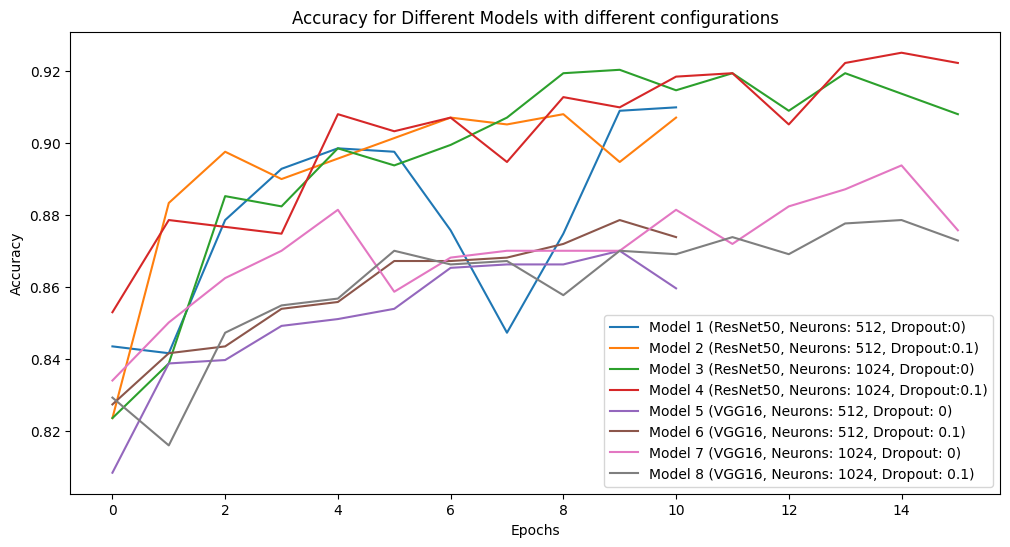

In [97]:
vacc1 = hist1.history['val_accuracy']
vacc2 = hist2.history['val_accuracy']
vacc3 = hist3.history['val_accuracy']
vacc4 = hist4.history['val_accuracy']
vacc5 = hist1_vgg.history['val_accuracy']
vacc6 = hist2_vgg.history['val_accuracy']
vacc7 = hist3_vgg.history['val_accuracy']
vacc8 = hist4_vgg.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(vacc1, label='Model 1 (ResNet50, Neurons: 512, Dropout:0)')
plt.plot(vacc2, label='Model 2 (ResNet50, Neurons: 512, Dropout:0.1)')
plt.plot(vacc3, label='Model 3 (ResNet50, Neurons: 1024, Dropout:0)')
plt.plot(vacc4, label='Model 4 (ResNet50, Neurons: 1024, Dropout:0.1)')
plt.plot(vacc5, label='Model 5 (VGG16, Neurons: 512, Dropout: 0)')
plt.plot(vacc6, label='Model 6 (VGG16, Neurons: 512, Dropout: 0.1)')
plt.plot(vacc7, label='Model 7 (VGG16, Neurons: 1024, Dropout: 0)')
plt.plot(vacc8, label='Model 8 (VGG16, Neurons: 1024, Dropout: 0.1)')
plt.title('Accuracy for Different Models with different configurations')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

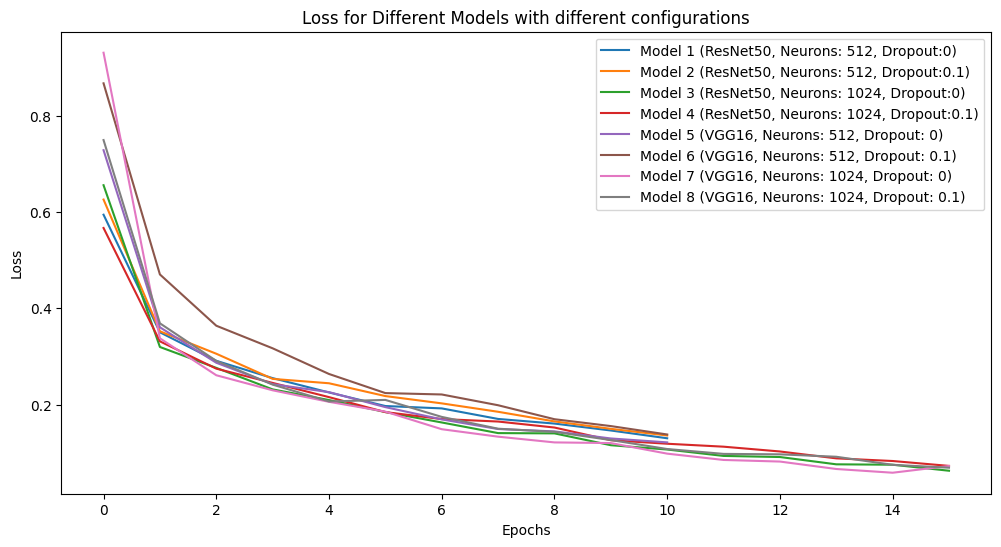

In [98]:
vloss1 = hist1.history['loss']
vloss2 = hist2.history['loss']
vloss3 = hist3.history['loss']
vloss4 = hist4.history['loss']
vloss5 = hist1_vgg.history['loss']
vloss6 = hist2_vgg.history['loss']
vloss7 = hist3_vgg.history['loss']
vloss8 = hist4_vgg.history['loss']

plt.figure(figsize=(12, 6))
plt.plot(vloss1, label='Model 1 (ResNet50, Neurons: 512, Dropout:0)')
plt.plot(vloss2, label='Model 2 (ResNet50, Neurons: 512, Dropout:0.1)')
plt.plot(vloss3, label='Model 3 (ResNet50, Neurons: 1024, Dropout:0)')
plt.plot(vloss4, label='Model 4 (ResNet50, Neurons: 1024, Dropout:0.1)')
plt.plot(vloss5, label='Model 5 (VGG16, Neurons: 512, Dropout: 0)')
plt.plot(vloss6, label='Model 6 (VGG16, Neurons: 512, Dropout: 0.1)')
plt.plot(vloss7, label='Model 7 (VGG16, Neurons: 1024, Dropout: 0)')
plt.plot(vloss8, label='Model 8 (VGG16, Neurons: 1024, Dropout: 0.1)')
plt.title('Loss for Different Models with different configurations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [99]:
y_test = valid_data.classes
y_pred = model.predict(valid_data)
y_pred = np.argmax(y_pred,axis=1)

33/33 [==============================] - 11s 295ms/step


In [100]:
labels=[key for key in train_data.class_indices]
print(classification_report(y_test,y_pred,target_names = labels))

                      precision    recall  f1-score   support

            cataract       0.94      0.93      0.93       259
diabetic_retinopathy       0.99      0.98      0.99       299
            glaucoma       0.86      0.87      0.87       243
              normal       0.88      0.90      0.89       253

            accuracy                           0.92      1054
           macro avg       0.92      0.92      0.92      1054
        weighted avg       0.92      0.92      0.92      1054



Confusion Matrix:
[[240   0  13   6]
 [  2 293   1   3]
 [ 10   0 212  21]
 [  4   2  20 227]]


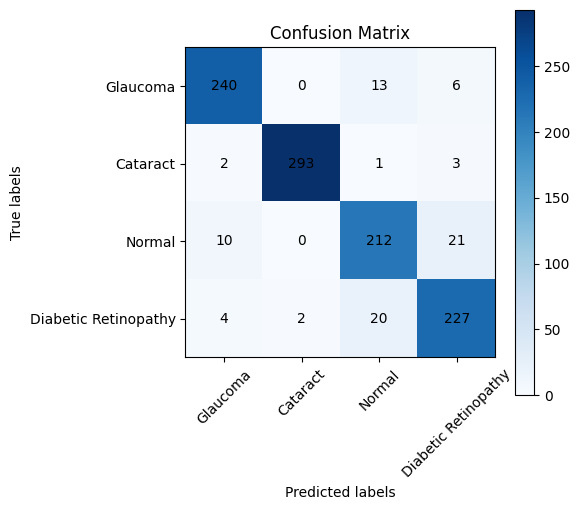

In [101]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
plt.figure(figsize=(5,5))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ['Glaucoma', 'Cataract', 'Normal', 'Diabetic Retinopathy']  
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()
